Brute-Force Matching with **ORB (*Oriented FAST and Rotated BRIEF*)** Descriptors

### Imports

In [43]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

print('OpenCV version: {}'.format(cv2.__version__))

OpenCV version: 3.1.0


### Load images

In [10]:
queryImg = cv2.imread(r'logo.png')
trainImg = cv2.imread(r'desk.jpg')

print('Query image -> size: {} shape: {}'.format(queryImg.size, queryImg.shape))
print('Train image -> size: {} shape: {}'.format(trainImg.size, trainImg.shape))

Query image -> size: 150912 shape: (393, 128, 3)
Train image -> size: 2359296 shape: (1024, 768, 3)


### Convert to gray scale

In [30]:
grayQuery = cv2.cvtColor(queryImg, cv2.COLOR_BGR2GRAY)
grayTrain = cv2.cvtColor(trainImg, cv2.COLOR_BGR2GRAY)

### Create ORB detector

In [31]:
orb = cv2.ORB_create()

### Find keypoints and descriptors

In [32]:
kpQuery, descQuery = orb.detectAndCompute(grayQuery, None)
kpTrain, descTrain = orb.detectAndCompute(grayTrain, None)

### Create matcher
We create a `BFMatcher` with distance measurement `cv2.NORM_HAMMING` and crossCheck is switched on for better results

In [33]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
print('Created Brute-Force matcher')

Created Brute-Force matcher


### Match descriptors

In [34]:
matches = matcher.match(descQuery, descTrain)
# Sort it for distance
matches = sorted(matches, key=lambda x:x.distance)

### Draw points
 We draw only first 100 matches 

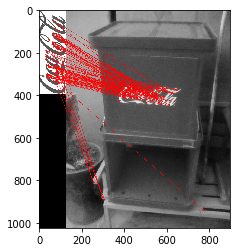

In [48]:
result = cv2.drawMatches(grayQuery, kpQuery, grayTrain, kpTrain, matches[:100], 
                         None, (255, 0, 0), flags=2)
cv2.imwrite('coca-cola-res.jpg', result)
plt.imshow(result)
plt.show()